In [1]:
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Automatic QC Based on String Separation TXT File

Reading in subarray separation txt file to dataframe

In [2]:
stat_data_file = input("Specify modeled data filename (csv format): ")

Specify modeled data filename (csv format): modeling_output.txt


In [3]:
#stat_data_file = "modeling_output.txt"

In [4]:
stat_data_clean = pd.DataFrame()

In [5]:
stat_data_clean = pd.read_csv(stat_data_file)

In [6]:
#stat_data_clean

In [7]:
separation_file = input("Specify filename for subarray separations: ")

Specify filename for subarray separations: seq0104_substring_separation.txt


In [8]:
#separation_file = "seq0104_substring_separation.txt"

In [9]:
separation_data = pd.DataFrame()

In [10]:
separation_data = pd.read_csv(separation_file, skiprows=1, delim_whitespace=True)

In [11]:
#separation_data

Plotting Subarray separation per shot:

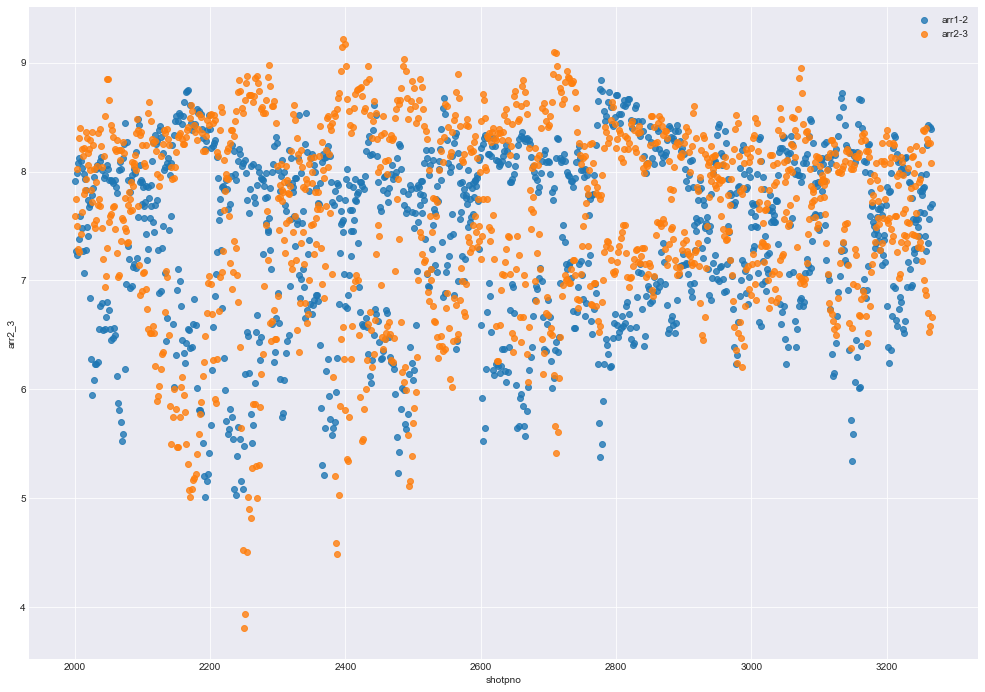

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(17,12))
sns.regplot(x=separation_data["shotpno"], y=separation_data["arr1_2"], fit_reg=False, label="arr1-2")
sns.regplot(x=separation_data["shotpno"], y=separation_data["arr2_3"], fit_reg=False, label="arr2-3")
plt.legend();

Rounding and making separations format compatible with modeled data dataframe:

In [13]:
def format_separation(x):
    y = x*2
    y = round(y)
    y = y*5
    return y

In [14]:
separation_data["Separation S1-S2"] = separation_data["arr1_2"].apply(lambda x: format_separation(x))
separation_data["Separation S2-S3"] = separation_data["arr2_3"].apply(lambda x: format_separation(x))

In [15]:
separation_data

,shotpno,arr1_2,arr2_3,Separation S1-S2,Separation S2-S3
0,2001,7.91,7.59,80,75
1,2002,7.27,7.75,75,80
2,2003,7.99,7.50,80,75
3,2004,7.23,8.02,70,80
4,2005,8.08,7.29,80,75
5,2006,7.38,8.31,75,85
6,2007,8.12,7.26,80,75
7,2008,7.59,8.40,75,85
8,2009,8.10,7.43,80,75
9,2010,7.48,8.21,75,80


Merging separation data with modeled data:

In [16]:
separation_data_merge = separation_data.merge(stat_data_clean, how='inner', left_on=['Separation S1-S2', 'Separation S2-S3'], right_on=['Separation S1-S2', 'Separation S2-S3']).sort_values(by=['shotpno']).reset_index().drop(['index', 'Farfield Name'], axis=1)

In [17]:
separation_data_merge

,shotpno,arr1_2,arr2_3,Separation S1-S2,Separation S2-S3,Peak,Peak %ch,P-to-P,P-to-P %ch,P/B,P/B %ch,X-corr,AvgdB,MaxdB,MaxPhase,Dropout Legal,X-corr Legal
0,2001,7.91,7.59,80,75,68.9,0.1,132.7,0.5,53.1,1.0,0.9999,0.04,0.1,0.422,True,green
1,2002,7.27,7.75,75,80,68.9,0.1,132.7,0.5,53.2,1.1,0.9999,0.04,0.1,0.382,True,green
2,2003,7.99,7.50,80,75,68.9,0.1,132.7,0.5,53.1,1.0,0.9999,0.04,0.1,0.422,True,green
3,2004,7.23,8.02,70,80,69.0,0.2,133.3,0.9,53.9,2.4,0.9997,0.08,0.2,0.778,True,green
4,2005,8.08,7.29,80,75,68.9,0.1,132.7,0.5,53.1,1.0,0.9999,0.04,0.1,0.422,True,green
5,2006,7.38,8.31,75,85,68.9,0.0,132.1,0.0,52.7,0.2,1.0000,0.01,0.0,0.153,True,green
6,2007,8.12,7.26,80,75,68.9,0.1,132.7,0.5,53.1,1.0,0.9999,0.04,0.1,0.422,True,green
7,2008,7.59,8.40,75,85,68.9,0.0,132.1,0.0,52.7,0.2,1.0000,0.01,0.0,0.153,True,green
8,2009,8.10,7.43,80,75,68.9,0.1,132.7,0.5,53.1,1.0,0.9999,0.04,0.1,0.422,True,green
9,2010,7.48,8.21,75,80,68.9,0.1,132.7,0.5,53.2,1.1,0.9999,0.04,0.1,0.382,True,green


Plotting shots and their legal label. There are two separate legal labels, one for x-correlation (green, yellow, red) and one based on dropout (binary)

In [18]:
def plot_shots(shotno, sep12, sep23, legal, title):
    plt.figure(figsize=(17, 12))
    sns.set_style("darkgrid")
    color = legal
    plt.scatter(shotno, sep12, c=color)
    plt.scatter(shotno, sep23, c=color)
    plt.xlabel("Shot point number")
    plt.ylabel("Subarray separation (dm)")
    plt.title(title)
    plt.show()

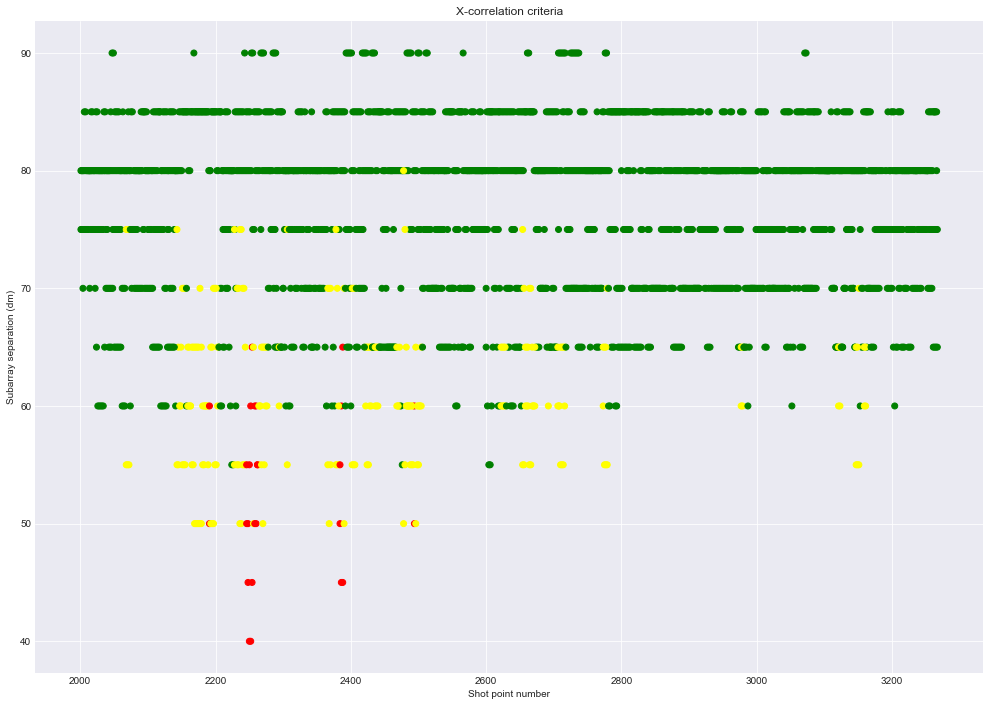

In [19]:
plot_shots(separation_data_merge["shotpno"], separation_data_merge["Separation S1-S2"], separation_data_merge["Separation S2-S3"], separation_data_merge["X-corr Legal"], "X-correlation criteria")

In [20]:
def plot_shots_xcorr(shotno, xcorr, legal, title):
    plt.figure(figsize=(17, 12))
    sns.set_style("darkgrid")
    color = legal
    plt.scatter(shotno, xcorr, c=color)
    plt.xlabel("Shot point number")
    plt.ylabel("X-correlation")
    plt.axhline(0.998, color='black', linestyle='dashed')
    plt.axhline(0.995, color='black', linestyle='dashed')
    plt.title(title)
    plt.show()

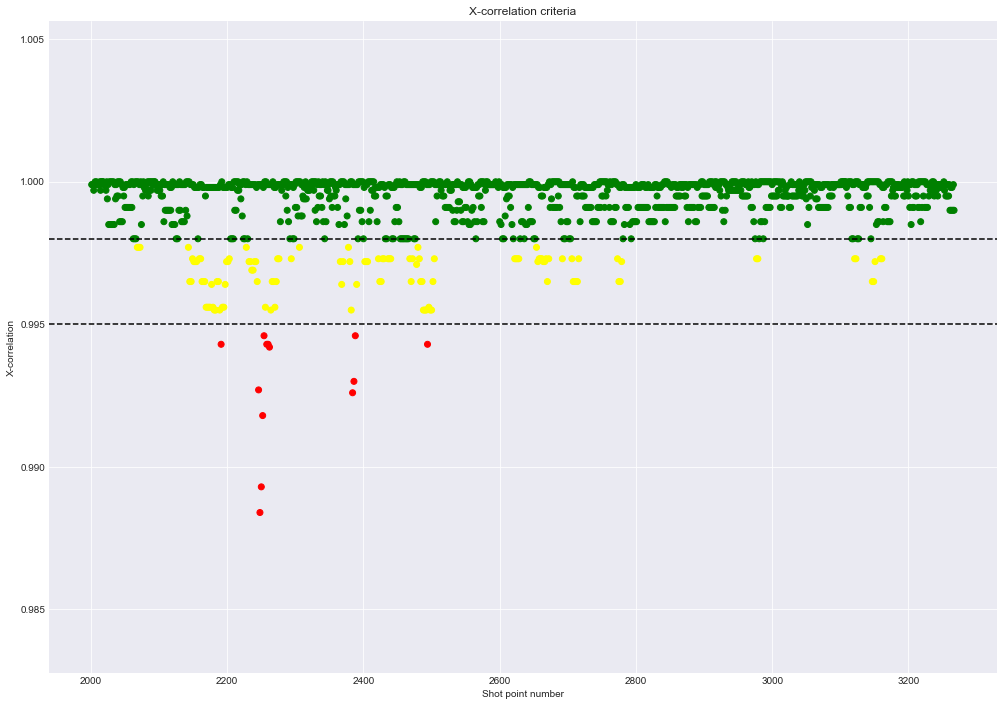

In [21]:
plot_shots_xcorr(separation_data_merge["shotpno"], separation_data_merge["X-corr"], separation_data_merge["X-corr Legal"], "X-correlation criteria" )

In [22]:
sep_data_xcorr_flagged = separation_data_merge[separation_data_merge["X-corr Legal"] != 'green']

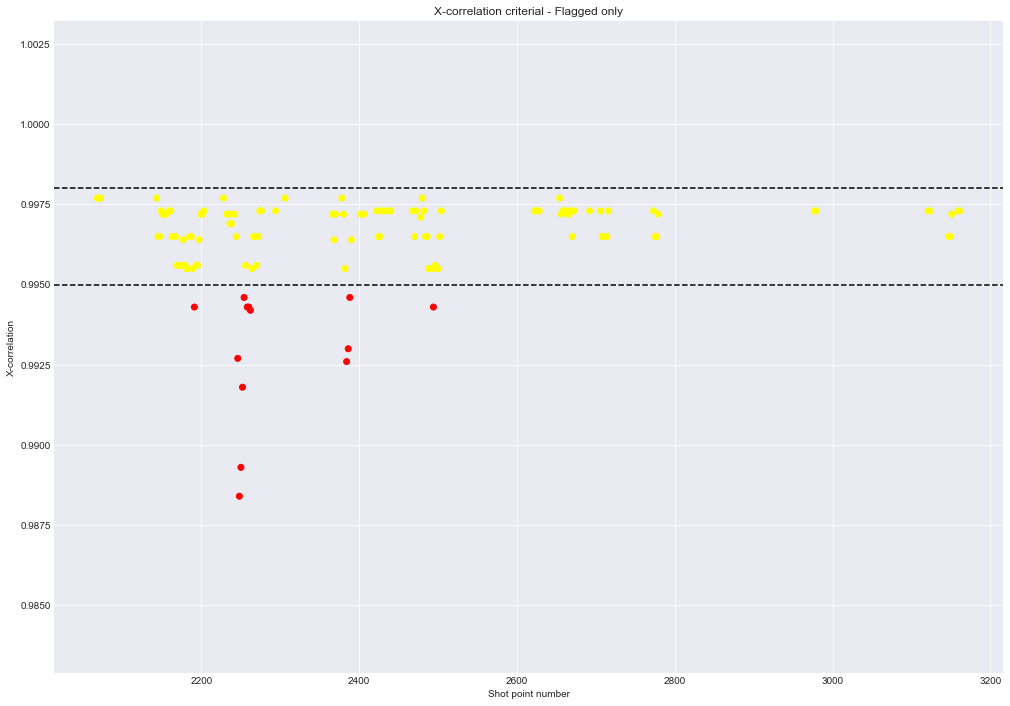

In [23]:
plot_shots_xcorr(sep_data_xcorr_flagged["shotpno"], sep_data_xcorr_flagged["X-corr"], sep_data_xcorr_flagged["X-corr Legal"], "X-correlation criterial - Flagged only")

In [24]:
sep_data_xcorr_flagged = sep_data_xcorr_flagged.reset_index().drop('index', axis=1)

In [25]:
sep_data_xcorr_flagged['test'] = sep_data_xcorr_flagged['shotpno'] - sep_data_xcorr_flagged.index*2

In [26]:
#sep_data_xcorr_flagged.head(40)

In [27]:
minvals = sep_data_xcorr_flagged.groupby(['test', 'X-corr Legal']).min().reset_index()[['test', 'shotpno', 'X-corr Legal']]

In [28]:
countvals = sep_data_xcorr_flagged.groupby(['test', 'X-corr Legal']).count().reset_index()[['test', 'shotpno']].rename(columns={'shotpno': 'Count'})

In [29]:
output = minvals.join(countvals, rsuffix="-r").drop(['test', 'test-r'], axis=1).sort_values('shotpno').reset_index().drop('index', axis=1)

In [31]:
output

,shotpno,X-corr Legal,Count
0,2068,yellow,3
1,2143,yellow,7
2,2159,yellow,22
3,2191,red,1
4,2228,yellow,1
5,2232,yellow,15
6,2246,red,8
7,2294,yellow,1
8,2306,yellow,1
9,2366,yellow,3


In [30]:
outputfilename = "SP_flagged_" + separation_file
output.to_csv(outputfilename, sep=',', index=False)